In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [49]:
# A dict with "milestone": date
coords = []

columns=['x', 'y', 'z', 'Notes']

coords.append([0, 0, -25, "Lifepod 5"])

coords.append([0, 3000, -1000, "North"])
coords.append([3000, 3000, -1000, "NE"])
coords.append([3000, 0, -1000, "East"])
coords.append([3000, -3000, -1000, "SE"])
coords.append([0, -3000, -1000, "South"])
coords.append([-3000, -3000, -1000, "SW"])
coords.append([-3000, 0, -1000, "West"])
coords.append([-3000, 3000, -1000, "NW"])

coords = pd.DataFrame(coords, columns=columns)


# commented out to prevent accidentally overwriting data
# coords.to_csv('210710_coordinates.csv')

In [50]:
from cmocean import cm
from quantify_core.visualization import mpl_plotting as qpl
from quantify_core.visualization.plot_interpolation import interpolate_heatmap

In [84]:

# coords

In [192]:
def plot_depth(coords):
    f, ax =plt.subplots(figsize=(25, 20))
    # ax.pcolormesh(X,Y,Z)
    interpolated_dataset = interpolate_heatmap(coords['x'], coords['y'], coords['z'], n=400)
    extent = (
        min(interpolated_dataset[0]),
        max(interpolated_dataset[0]),
        min(interpolated_dataset[1]),
        max(interpolated_dataset[1]),
    )

    # mappable = ax.imshow(
    #     interpolated_dataset[2],
    #     extent=extent,
    #     aspect="auto",
    #     origin="lower",
    #     cmap=cm.deep_r,
    #     vmin=-500,
    # )

    levels=np.linspace(-450,450, 41)

    ax.contour(interpolated_dataset[0], interpolated_dataset[1], interpolated_dataset[2],
        levels=levels,colors='black', linestyles='solid', linewidths=.5,
    )
    mappable = ax.contourf(
        interpolated_dataset[0], interpolated_dataset[1], interpolated_dataset[2], cmap=cm.topo, 
        levels=levels,
        vmin=-500,vmax=500, extend='min',
    )

    mappable.set_clim(-500,500)
    cbar = f.colorbar(mappable, ax=ax)
    # cbar.

    # Scatter plot of measured datapoints
    ax.plot(
        coords['x'],
        coords['y'],
        marker=".",
        linewidth=0.5,
        linestyle="",
        markerfacecolor="white",
        markeredgecolor="red",
        markersize=3,
        c="white",
        alpha=1,
    )
    ax.set_aspect('equal')
    ax.grid()

    qpl.set_xlabel(
        ax, "Longtitude", "m"
    )
    qpl.set_ylabel(
        ax, "Lattitude", "m"
    )

    qpl.set_cbarlabel(cbar, 'Elevation', "m")

    return f, ax 



(-1750.0, 1750.0)

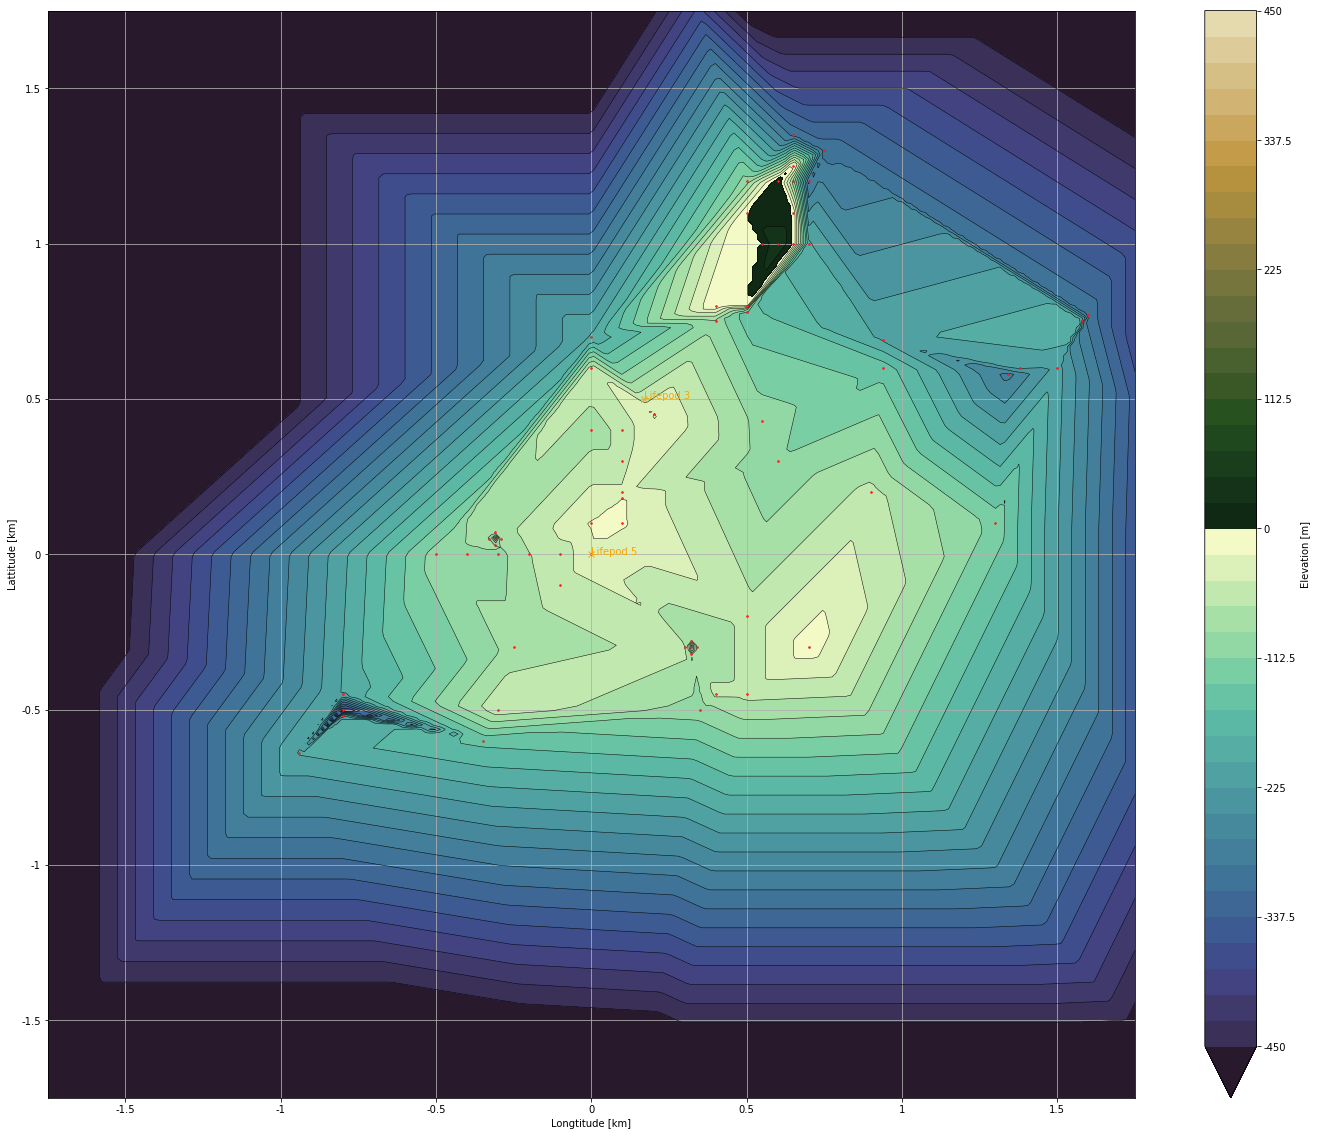

In [209]:
coords = pd.read_csv('210711_coordinates.csv')
f, ax = plot_depth(coords)

ax.plot(0,0, marker='x', color='orange', label='Lifepod 5')
ax.text(0,0, 'Lifepod 5', color='Orange')
ax.plot(170,500, marker='x', color='orange', label='Lifepod 3')
ax.text(170,500, 'Lifepod 3', color='Orange')

ax.set_xlim(-1750, 1750)
ax.set_ylim(-1750, 1750)

In [203]:
Z.shape

NameError: name 'Z' is not defined